In [1]:
include("speciale_tools.jl")
import JLD
import PyPlot

In [2]:
1+1

2

In [3]:
chini_folder = "/home/data/simon/result/chini"

"/home/data/simon/result/chini"

### Buldings 

In [19]:
rasterio = PyCall.pyimport("rasterio");

In [20]:
urban_tiff = rasterio.open(joinpath(chini_folder,"IW_Houston_urban_map_hh_hv_OR.tif"));
transform = urban_tiff.get_transform()
rows = collect(1:urban_tiff.height).-1;
columns = collect(1:urban_tiff.width).-1;
tif_lon = transform[1] .+ rows .* transform[2];
tif_lat = transform[4] .+ columns .* transform[6];

In [21]:
urban_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 12975
  "nodata"    => nothing
  "count"     => 1
  "width"     => 14906
  "transform" => (20.0, 0.0, 61840.0, 0.0, -20.0, 3.44652e6, 0.0, 0.0, 1.0)
  "crs"       => PyObject CRS.from_epsg(32615)

In [22]:
urban_band = urban_tiff.read(1);

In [23]:
convert(Int64,maximum(urban_band)),convert(Int64,minimum(urban_band))

(1, 0)

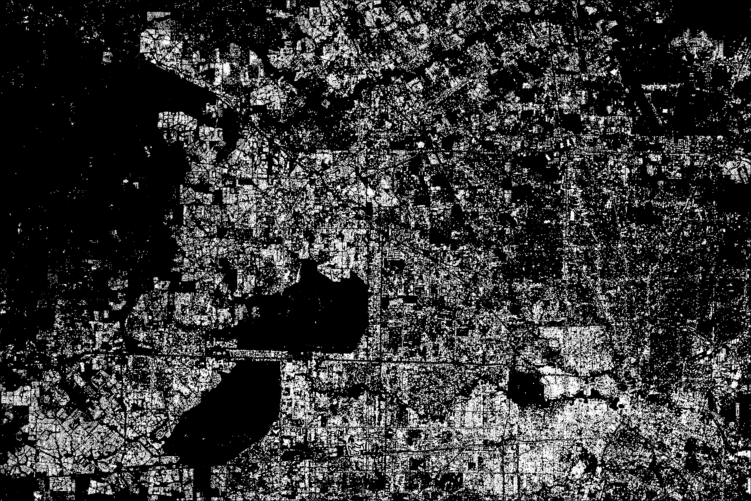

In [16]:
Colors.Gray.(urban_band[6000:8000,8000:11000])

In [24]:
sum(.!((urban_band .== 1) .| (urban_band .== 0) ) ) 

0

### Urban Flooding

In [17]:
urban_tiff = rasterio.open(joinpath(chini_folder,"IW_Houston_flood_map_buildings_coh_20170830.tif"));
transform = urban_tiff.get_transform()
rows = collect(1:urban_tiff.height).-1;
columns = collect(1:urban_tiff.width).-1;
tif_lon = transform[1] .+ rows .* transform[2];
tif_lat = transform[4] .+ columns .* transform[6];

In [18]:
urban_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 12975
  "nodata"    => nothing
  "count"     => 1
  "width"     => 14906
  "transform" => (20.0, 0.0, 61840.0, 0.0, -20.0, 3.44652e6, 0.0, 0.0, 1.0)
  "crs"       => PyObject CRS.from_epsg(32615)

In [19]:
urban_flood_band = urban_tiff.read(1);

In [20]:
convert(Int64,maximum(urban_flood_band)),convert(Int64,minimum(urban_flood_band))

(1, 0)

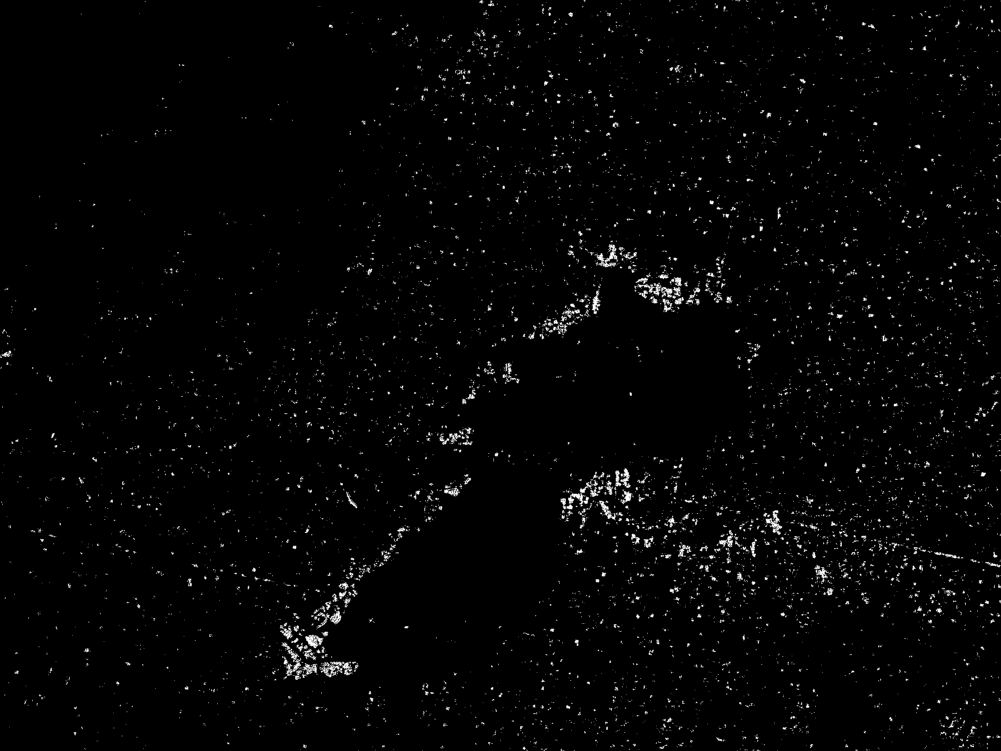

In [25]:
Colors.Gray.(urban_flood_band[6500:8000,8000:10000])

In [23]:
sum(.!((urban_flood_band.== 1) .| (urban_flood_band.== 0) ) ) 

0

## Rural Floodin

In [5]:
rural_tiff = rasterio.open(joinpath(chini_folder,"20170824_20170830_bare_soil_flood_map.tif"));


In [6]:
rural_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 12974
  "nodata"    => nothing
  "count"     => 1
  "width"     => 14910
  "transform" => (20.0, 0.0, 61760.0, 0.0, -20.0, 3.4465e6, 0.0, 0.0, 1.0)
  "crs"       => PyObject CRS.from_epsg(32615)

In [7]:
rural_flood = rural_tiff.read(1);

In [8]:
convert(Int64,maximum(rural_flood)),convert(Int64,minimum(rural_flood))

(1, 0)

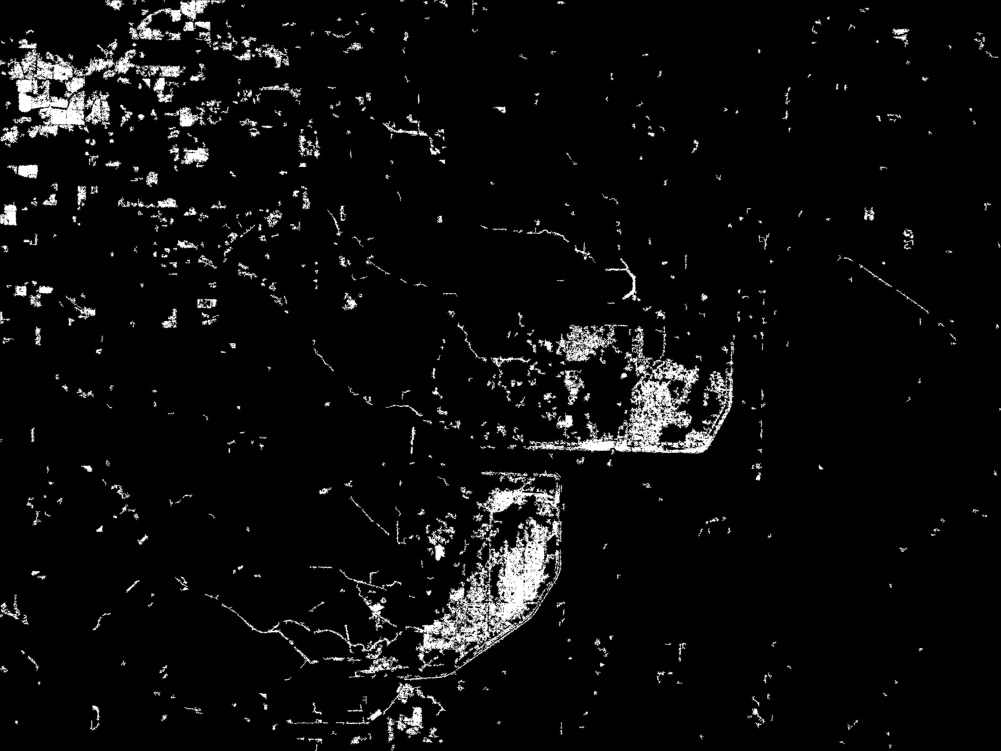

In [9]:
Colors.Gray.(rural_flood[6500:8000,8000:10000])

In [10]:
sum(.!((rural_flood.== 1) .| (rural_flood.== 0) ) ) 

0

### Binary Mask

In [11]:
BM_tiff = rasterio.open(joinpath(chini_folder,"Selected_tiles.tif"));


In [12]:
BM_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "int16"
  "height"    => 12974
  "nodata"    => nothing
  "count"     => 1
  "width"     => 14910
  "transform" => (20.0, 0.0, 61760.0, 0.0, -20.0, 3.4465e6, 0.0, 0.0, 1.0)
  "crs"       => PyObject CRS.from_epsg(32615)

In [13]:
BM = BM_tiff.read(1);

In [14]:
convert(Int64,maximum(BM)),convert(Int64,minimum(BM))

(1, 0)

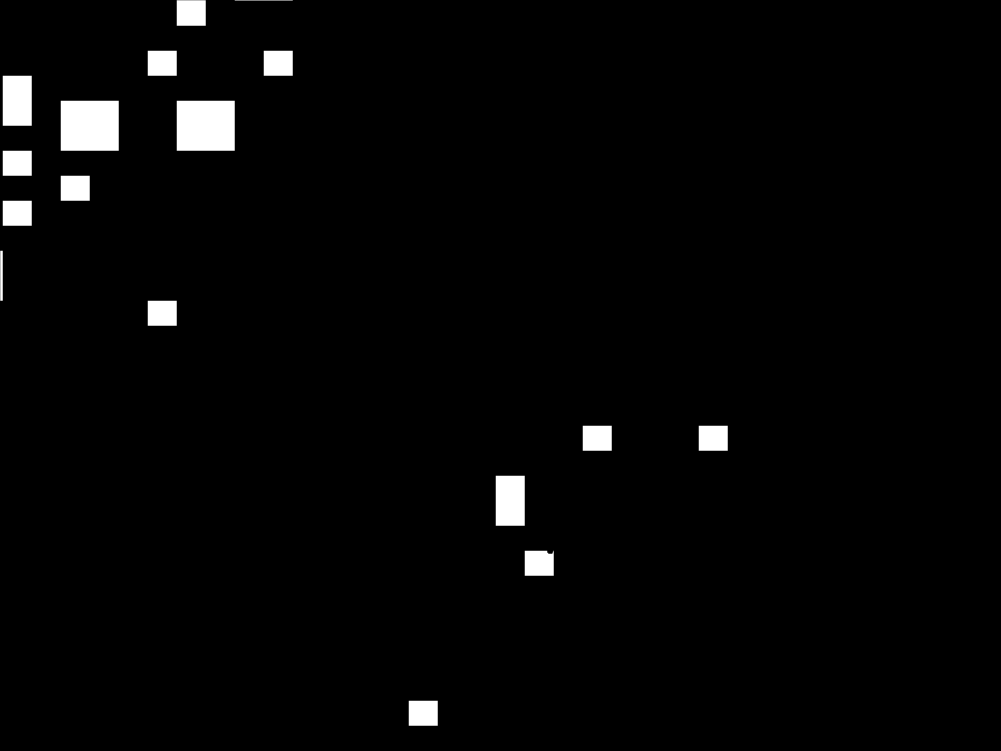

In [24]:
Colors.Gray.(BM[6500:8000,8000:10000])

In [16]:
sum(.!((BM.== 1) .| (BM.== 0) ) ) 

0

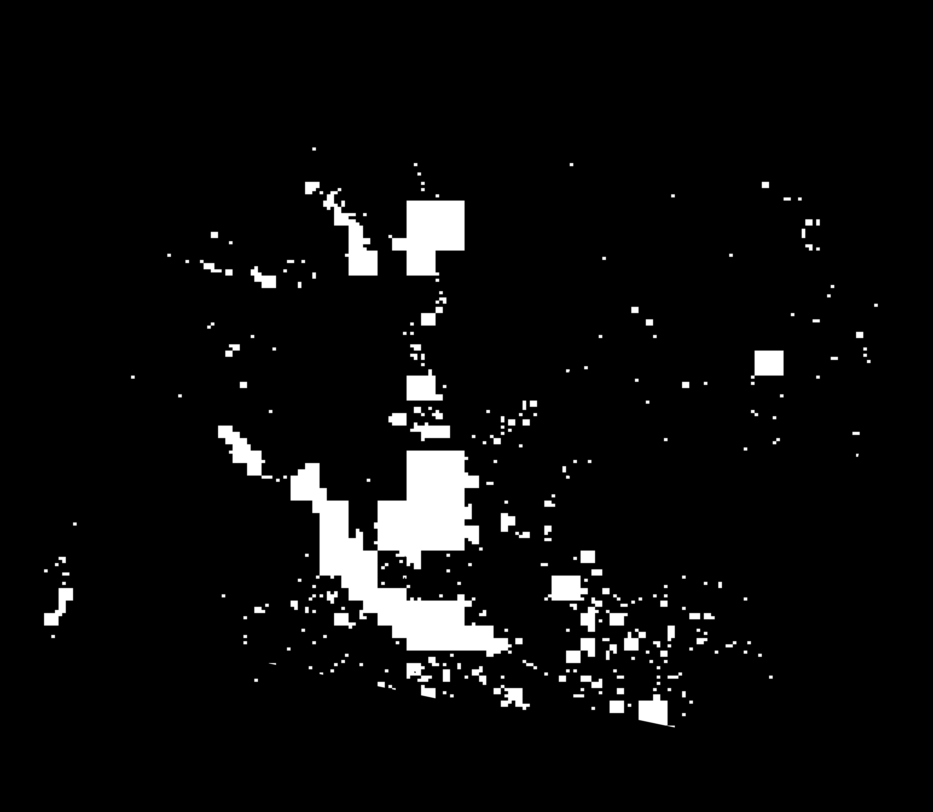

In [17]:
Colors.Gray.(BM)

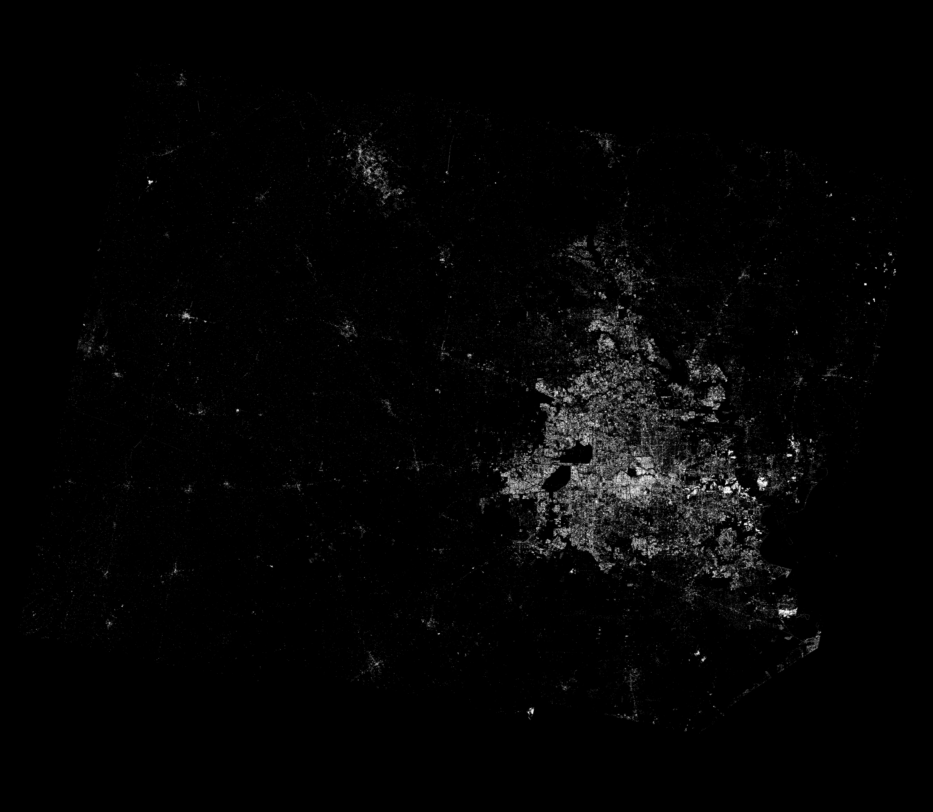

In [25]:
Colors.Gray.(urban_band)